## Задача 1

Даны значения зарплат из выборки выпускников:

100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150

Используя только встроенные питоновские функции и структуры данных (т.е. без библиотек numpy, pandas и др.) посчитать среднее арифметическое, смещённую и несмещённую оценки дисперсии, среднее квадратичное отклонение для данной выборки.

Можно затем посчитать те же значения с использованием библиотек, чтобы проверить себя.

In [1]:
import numpy as np
import pandas as pd

In [2]:
a = np.array([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150])

In [3]:
b = sum(a)
m = b/len(a) # Среднее арифметическое
m 

73.14285714285714

In [4]:
np.mean(a) # проверяем

73.14285714285714

In [5]:
sum((a-m)**2) #

44836.571428571435

In [6]:
d = np.sqrt((sum((a-m)**2)/len(a)))  #среднеквадратичное отклонение на основе смещенной дисперсии
d

46.20686994302874

In [7]:
d1 = np.sqrt(sum((a-m)**2)/(len(a)-1)) # среднеквадратичное отклонение на основе несмещенное дисперсии
d1

47.34795213553139

In [8]:
a.std() # Проверяем 

46.206869943028735

In [9]:
a.std(ddof = 1)

47.347952135531386

In [10]:
d3 = sum((a-m)**2)/len(a) #смещенная дисперсия 
d3

2135.074829931973

In [11]:
d4 = sum((a-m)**2)/(len(a)-1) #несмещенная дисперсия 
d4

2241.8285714285716

In [12]:
np.var(a) #Проверяем: смещенная дисперсия 

2135.0748299319725

In [13]:
np.var(a, ddof = 1) #Проверяем: несмещенная дисперсия 

2241.828571428571

## Задача 2

Для выборки из задачи 1 найти (также без использования библиотек):
1. медиану, первый и третий квартили, интерквартильное расстояние,
2. выбрсы в выборке (используя для этого метод как при построении "усов" из boxplot).

Возможные неоднозначности в вычислении квантилей можно разрешать любым способом.

In [14]:
mediana = a/len(a)
mediana

array([ 4.76190476,  3.80952381,  3.57142857,  3.66666667,  4.23809524,
        1.57142857,  2.14285714,  1.19047619,  3.0952381 ,  0.80952381,
        1.42857143, 10.95238095,  1.14285714,  2.71428571,  2.61904762,
        3.33333333,  3.57142857,  3.0952381 ,  4.        ,  4.28571429,
        7.14285714])

In [15]:
np.median(a) # Медиана

70.0

In [16]:
a = np.sort(a) # Соритируем
ind = len(a)//2 # Находим середину без остатка
a[ind] # Медианна

70

In [17]:
qu25 = len(a)//4
qu25 = a[qu25] # Первый квартиль
qu25

45

In [18]:
qu75 = len(a)*3//4
qu75 = a[qu75] # третий квартиль
qu75

84

In [19]:
np.quantile(a, 0.25) #проверяем

45.0

In [20]:
np.quantile(a, 0.75)# проверяем

84.0

In [21]:
np.quantile(a, 0.5)

70.0

In [22]:
iqr = qu75-qu25
iqr15=iqr*1.5
iqr15

58.5

In [23]:
moustache25 = iqr15-qu25
moustache25


13.5

In [24]:
moustache75 = iqr15+qu75
moustache75

142.5

In [25]:
boxplot=[moustache25, qu25, qu75, moustache75]
print(boxplot)

[13.5, 45, 84, 142.5]


In [26]:
for i in a:
    if i > moustache75:
        print(f'Усы над 75 квантилем {i}')
    elif i < moustache25:
        print(f'Усы под 25 квантилем {i}')

Усы над 75 квантилем 150
Усы над 75 квантилем 230


In [27]:
import seaborn as sns

[(17, 105)]

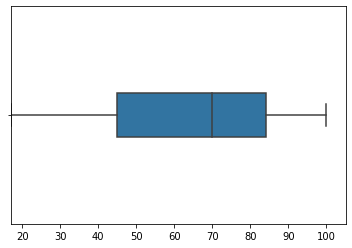

In [28]:
ax = sns.boxplot(a, width=0.2)
ax.set(xlim=(17, 105))


{'whiskers': [<matplotlib.lines.Line2D at 0x267e0e39c88>,
 'caps': [<matplotlib.lines.Line2D at 0x267e0e463c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x267e0e39860>],
 'medians': [<matplotlib.lines.Line2D at 0x267e0e46a58>],
 'fliers': [<matplotlib.lines.Line2D at 0x267e0e46d68>],
 'means': []}

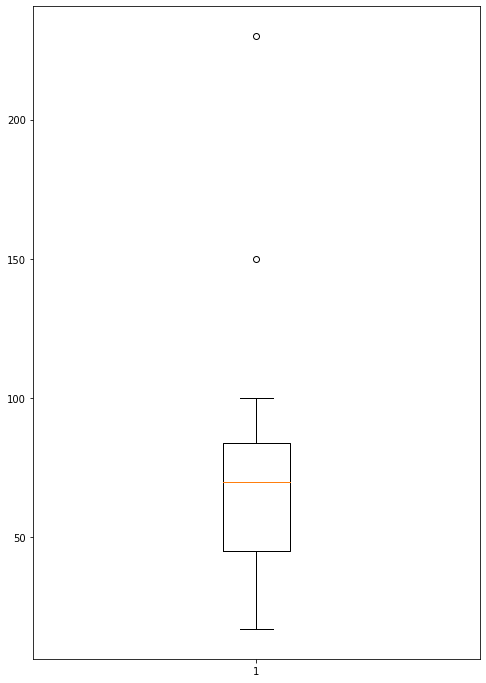

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,12])
plt.boxplot(a)

Или у меня ошибка или в seaborn для построения усов не испольуется 1,5*(75-25 квантильная разница) + 75 квантиль или - 25 квантиль. Визуально  верхний ус меньше, чем нижний.

In [30]:
data = {list : a}
frame = pd.DataFrame(data)
frame.describe()

,<class 'list'>
count,21.000000
mean,73.142857
std,47.347952
min,17.000000
25%,45.000000
50%,70.000000
75%,84.000000
max,230.000000


## Задача 3

В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?

Замечание: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

In [33]:
AB1 = 0.8 # Вероятность того, что студент факультета A сдаст первую сессию
AB2 = 0.7 # Вероятность того, что студент факультета B сдаст первую сессию
AB3 = 0.9 # Вероятность того, что студент факультета C сдаст первую сессию

In [34]:
import sympy as sm

In [35]:
x = sm.Symbol('x')
result = sm.solve(AB1*x+AB2*x+AB3*x-1) # Найдем коэффециент x
x = result[0]

In [36]:
A1 = AB1*x
B1 = AB2*x
C1 = AB3*x
print (f'a) на факультете A = {A1} б) на факультете B - {B1} в) на факультете C - {C1}')

a) на факультете A = 0.333333333333333 б) на факультете B - 0.291666666666667 в) на факультете C - 0.375000000000000


Мне кажется первый способ легче, но если необходимо применить формулу Байеса, то второе решение:


In [37]:
P = 1/3*(AB1+AB2+AB3)
P

0.7999999999999999

In [38]:
A1_= (AB1*1/3)/P
A1_

0.33333333333333337

In [39]:
B1_ = (AB2*1/3)/P
B1_

0.2916666666666667

In [40]:
C1_ = (AB3*1/3)/P
C1_

0.375

### Ответ такой же: a) на факультете A = 0.333333333333333 б) на факультете B - 0.291666666666667 в) на факультете C - 0.375000000000000
